In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as r
import datetime

In [86]:
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)


In [87]:
file = "Resources/compiled_air_and_ground.xlsx"
raw_data = pd.read_excel(file)
raw_data.head()

,YEAR,DEPARTURES_PERFORMED,PAYLOAD(Pounds),PASSENGERS,AIR_TIME(Minutes),TOTAL_DISTANCE(Miles),Commuters(1000s),Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles),Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles),Fuel_Consumption(1000_gallons),Commuters(1000s).1,Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles).1,Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles).1,Fuel_Consumption(1000_gallons).1,Average of Median AQI,Average Unhealthy days,Average Good Days,Average Moderate Days,Average of Max AQI,Average of 90th Percentile AQI
0,1990,6232613,203651000000,448862173,535814798,3693540511,66666,937600,1006700,1375743,66666,937600,1006700,1375743,37.393498,7.255404,247.576598,79.176163,144.091928,79.136771
1,1991,6090824,196631000000,434938070,522071075,3584318850,68924,961160,1033305,1464126,68924,961160,1033305,1464126,36.980769,7.693290,249.173169,78.560061,146.527778,79.545940
2,1992,6266016,201244000000,454342117,535554649,3685605954,70903,1000565,1069593,1552708,70903,1000565,1069593,1552708,34.510373,4.799015,268.036627,69.622075,136.483402,69.569502
3,1993,6394057,202611000000,464431683,554477111,3812895723,72993,1039035,1104515,1651324,72993,1039035,1104515,1651324,35.639918,5.683167,262.487974,72.183766,138.348765,73.783951
4,1994,6679890,210364000000,505298026,578431610,3995930469,75124,1075665,1141895,1760533,75124,1075665,1141895,1760533,35.622111,5.520198,260.313781,74.571715,138.854271,74.025126


In [88]:
# data_columns = raw_data.drop(columns=["Average of Median AQI", "Average Unhealthy days ", "Average Good Days", "Average Moderate Days", "Average of Max AQI", "Average of 90th Percentile AQI"])
# data_columns

# Use different set of features (use less/more)
data_columns = raw_data[["Commuters(1000s)", "Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles)",
                         "Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles)", "Fuel_Consumption(1000_gallons)",
                        "DEPARTURES_PERFORMED", "PAYLOAD(Pounds)", "AIR_TIME(Minutes)", "TOTAL_DISTANCE(Miles)", "Average of 90th Percentile AQI"]]
data_columns

,Commuters(1000s),Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles),Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles),Fuel_Consumption(1000_gallons),DEPARTURES_PERFORMED,PAYLOAD(Pounds),AIR_TIME(Minutes),TOTAL_DISTANCE(Miles),Average of 90th Percentile AQI
0,66666,937600,1006700,1375743,6232613,203651000000,535814798,3693540511,79.136771
1,68924,961160,1033305,1464126,6090824,196631000000,522071075,3584318850,79.545940
2,70903,1000565,1069593,1552708,6266016,201244000000,535554649,3685605954,69.569502
3,72993,1039035,1104515,1651324,6394057,202611000000,554477111,3812895723,73.783951
4,75124,1075665,1141895,1760533,6679890,210364000000,578431610,3995930469,74.025126
5,77372,1114585,1175950,1870746,7176799,215289000000,614196316,4210392398,74.702729
6,79823,1150380,1207500,1984854,7322805,218303000000,639294472,4357584225,70.944606
7,82246,1183160,1236925,2099316,7262409,223244000000,653024548,4480350970,71.901435
8,84857,1222428,1260135,2213303,7255086,226368000000,660550514,4531198786,81.741071
9,87330,1259935,1292795,2335906,7607331,236307000000,702169726,4828342914,85.524605


In [89]:
data_columns.shape

(28, 9)

In [90]:
X = data_columns.drop(columns=["Average of 90th Percentile AQI"])
X

y = data_columns[["Average of 90th Percentile AQI"]]
y

print(X.shape, y.shape)

(28, 8) (28, 1)


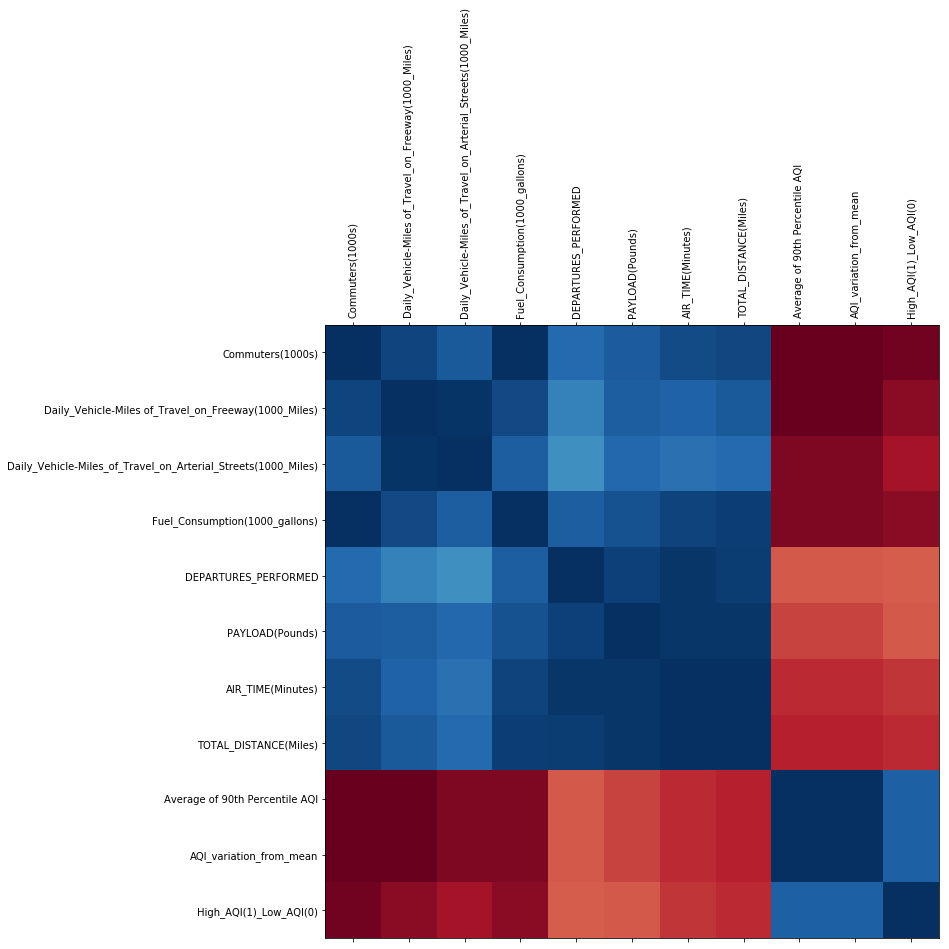

In [127]:
corr = data_columns.corr(method='pearson')

fig = plt.figure(figsize=(11,11))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.savefig("Images/Corr_img_1")

In [92]:
#data_columns.to_csv("export_2.csv")

In [93]:
# You can plot to see the trend of each and every feature

# plt.scatter(X["Commuters(1000s)"], y)
# plt.scatter(X["Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles)"], y) #Linear Trend
# plt.scatter(X["Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles)"], y) #Linear Trend
# plt.scatter(X["Fuel_Consumption(1000_gallons)"], y)
# plt.scatter(X["DEPARTURES_PERFORMED"], y)
# plt.scatter(X["PAYLOAD(Pounds)"], y)
# plt.scatter(X["AIR_TIME(Minutes)"], y)
# plt.scatter(X["TOTAL_DISTANCE(Miles)"], y)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=324)

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [96]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8026403078648834
Testing Score: -4.0141542238608094


In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
MSE_2 = median_absolute_error(y_test, predictions)
MSE_3 = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MSE_3}")
print(f"Median Absolute Error: {MSE_2}")

Mean Squared Error: 188.9517475573085
Mean Absolute Error: 8.561790384918254
Median Absolute Error: 5.492744383825212


# Decision Tree Classifier

In [98]:
aqi_mean = data_columns["Average of 90th Percentile AQI"].mean()
print(f"Mean of AQI is {aqi_mean}")

Mean of AQI is 70.49711172647113


In [99]:
aqi_mean_variation = data_columns["Average of 90th Percentile AQI"] - aqi_mean
aqi_mean_variation
data_columns["AQI_variation_from_mean"] = aqi_mean_variation
data_columns

C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Commuters(1000s),Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles),Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles),Fuel_Consumption(1000_gallons),DEPARTURES_PERFORMED,PAYLOAD(Pounds),AIR_TIME(Minutes),TOTAL_DISTANCE(Miles),Average of 90th Percentile AQI,AQI_variation_from_mean
0,66666,937600,1006700,1375743,6232613,203651000000,535814798,3693540511,79.136771,8.639660
1,68924,961160,1033305,1464126,6090824,196631000000,522071075,3584318850,79.545940,9.048828
2,70903,1000565,1069593,1552708,6266016,201244000000,535554649,3685605954,69.569502,-0.927610
3,72993,1039035,1104515,1651324,6394057,202611000000,554477111,3812895723,73.783951,3.286839
4,75124,1075665,1141895,1760533,6679890,210364000000,578431610,3995930469,74.025126,3.528014
5,77372,1114585,1175950,1870746,7176799,215289000000,614196316,4210392398,74.702729,4.205617
6,79823,1150380,1207500,1984854,7322805,218303000000,639294472,4357584225,70.944606,0.447495
7,82246,1183160,1236925,2099316,7262409,223244000000,653024548,4480350970,71.901435,1.404324
8,84857,1222428,1260135,2213303,7255086,226368000000,660550514,4531198786,81.741071,11.243960
9,87330,1259935,1292795,2335906,7607331,236307000000,702169726,4828342914,85.524605,15.027494


In [100]:
data_columns.loc[data_columns["AQI_variation_from_mean"] > 0, "High_AQI(1)_Low_AQI(0)"] = 1
data_columns.loc[data_columns["AQI_variation_from_mean"] < 0, "High_AQI(1)_Low_AQI(0)"] = 0
data_columns

C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Commuters(1000s),Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles),Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles),Fuel_Consumption(1000_gallons),DEPARTURES_PERFORMED,PAYLOAD(Pounds),AIR_TIME(Minutes),TOTAL_DISTANCE(Miles),Average of 90th Percentile AQI,AQI_variation_from_mean,High_AQI(1)_Low_AQI(0)
0,66666,937600,1006700,1375743,6232613,203651000000,535814798,3693540511,79.136771,8.639660,1.0
1,68924,961160,1033305,1464126,6090824,196631000000,522071075,3584318850,79.545940,9.048828,1.0
2,70903,1000565,1069593,1552708,6266016,201244000000,535554649,3685605954,69.569502,-0.927610,0.0
3,72993,1039035,1104515,1651324,6394057,202611000000,554477111,3812895723,73.783951,3.286839,1.0
4,75124,1075665,1141895,1760533,6679890,210364000000,578431610,3995930469,74.025126,3.528014,1.0
5,77372,1114585,1175950,1870746,7176799,215289000000,614196316,4210392398,74.702729,4.205617,1.0
6,79823,1150380,1207500,1984854,7322805,218303000000,639294472,4357584225,70.944606,0.447495,1.0
7,82246,1183160,1236925,2099316,7262409,223244000000,653024548,4480350970,71.901435,1.404324,1.0
8,84857,1222428,1260135,2213303,7255086,226368000000,660550514,4531198786,81.741071,11.243960,1.0
9,87330,1259935,1292795,2335906,7607331,236307000000,702169726,4828342914,85.524605,15.027494,1.0


In [101]:
target = data_columns["High_AQI(1)_Low_AQI(0)"]
target_names = ["High", "Low"]
feature_names = X.columns
X.head()

,Commuters(1000s),Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles),Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles),Fuel_Consumption(1000_gallons),DEPARTURES_PERFORMED,PAYLOAD(Pounds),AIR_TIME(Minutes),TOTAL_DISTANCE(Miles)
0,66666,937600,1006700,1375743,6232613,203651000000,535814798,3693540511
1,68924,961160,1033305,1464126,6090824,196631000000,522071075,3584318850
2,70903,1000565,1069593,1552708,6266016,201244000000,535554649,3685605954
3,72993,1039035,1104515,1651324,6394057,202611000000,554477111,3812895723
4,75124,1075665,1141895,1760533,6679890,210364000000,578431610,3995930469


In [102]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, target, random_state=42)

In [103]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.7142857142857143

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X2_train, y2_train)
rf.score(X2_test, y2_test)

0.8571428571428571

In [105]:
feature_priority = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
feature_priority

[(0.1912961247986927, 'Commuters(1000s)'),
 (0.16479573323292623, 'Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles)'),
 (0.161639708101391, 'Fuel_Consumption(1000_gallons)'),
 (0.13435375382860126,
  'Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles)'),
 (0.12024287093749787, 'TOTAL_DISTANCE(Miles)'),
 (0.07958410612302196, 'AIR_TIME(Minutes)'),
 (0.07644803207939861, 'DEPARTURES_PERFORMED'),
 (0.07163967089847044, 'PAYLOAD(Pounds)')]

In [106]:
commuters = feature_priority[0][0]
fuel = feature_priority[1][0]
miles_travel_freeway = feature_priority[2][0]
miles_travel_arterial_streets = feature_priority[3][0]
departures_performed = feature_priority[4][0]
airtime = feature_priority[5][0]
total_distance = feature_priority[6][0]
payload = feature_priority[7][0]

In [107]:
df = pd.DataFrame({
    "Parameter": ["Commuters(1000s)", "Daily_Vehicle-Miles of_Travel_on_Freeway(1000_Miles)",
                  "Daily_Vehicle-Miles_of_Travel_on_Arterial_Streets(1000_Miles)", "Fuel_Consumption(1000_gallons)", 
                 "DEPARTURES_PERFORMED", "PAYLOAD(Pounds)", "AIR_TIME(Minutes)", "TOTAL_DISTANCE(Miles)"],
    "Probability": [commuters, miles_travel_freeway, miles_travel_arterial_streets, fuel, departures_performed, 
                   payload, airtime, total_distance]
})
df

,Parameter,Probability
0,Commuters(1000s),0.191296
1,Daily_Vehicle-Miles of_Travel_on_Freeway(1000_...,0.161640
2,Daily_Vehicle-Miles_of_Travel_on_Arterial_Stre...,0.134354
3,Fuel_Consumption(1000_gallons),0.164796
4,DEPARTURES_PERFORMED,0.120243
5,PAYLOAD(Pounds),0.071640
6,AIR_TIME(Minutes),0.079584
7,TOTAL_DISTANCE(Miles),0.076448


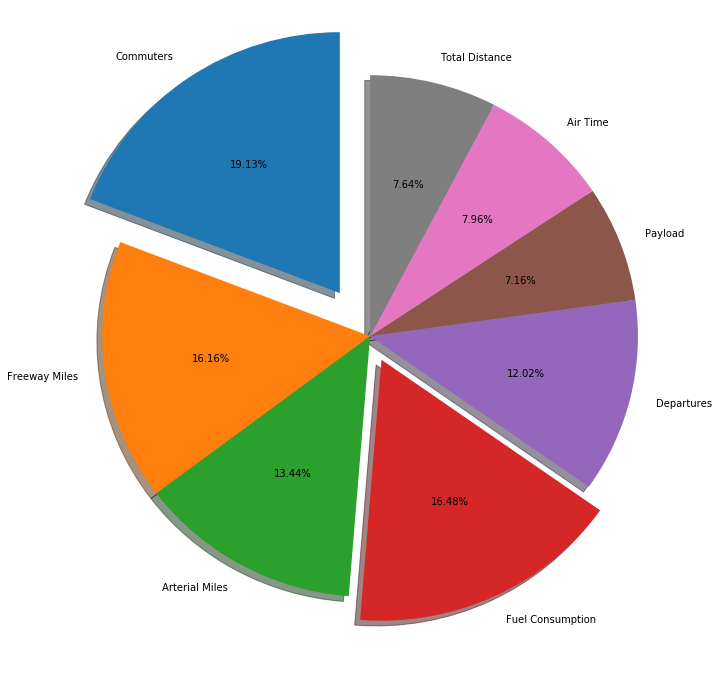

In [108]:
labels = "Commuters", "Freeway Miles", "Arterial Miles", "Fuel Consumption", "Departures", "Payload", "Air Time", "Total Distance" 
explode = (0.2, 0, 0, 0.1, 0, 0, 0, 0)
sizes = df["Probability"]
fig1, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (12, 12)
ax1.pie(sizes, labels=labels, explode=explode, shadow=True, startangle=90, center=(0, 0), autopct='%1.2f%%')
plt.savefig("Images/tree_pie")

In [109]:
file = "Resources/emissions.csv"
emissions_df = pd.read_csv(file)
emissions_df.head()

C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [110]:
emissions_df = emissions_df[['Year', 'Engine Cylinders', 'Fuel Type 1', 'City MPG (FT1)', 'Highway MPG (FT1)', 'Tailpipe CO2 in Grams/Mile (FT1)', 'Fuel Type 2', 'City MPG (FT2)', 'Highway MPG (FT2)', 'Tailpipe CO2 in Grams/Mile (FT2)', 'Fuel Economy Score', 'GHG Score', 'GHG Score (Alt Fuel)', 'Gasoline/Electricity Blended (CD)']]
emissions_df

,Year,Engine Cylinders,Fuel Type 1,City MPG (FT1),Highway MPG (FT1),Tailpipe CO2 in Grams/Mile (FT1),Fuel Type 2,City MPG (FT2),Highway MPG (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),Gasoline/Electricity Blended (CD)
0,1984,6.0,Regular Gasoline,17,24,444.350000,NaN,0,0,0.0,-1,-1,-1,False
1,1984,6.0,Regular Gasoline,17,24,444.350000,NaN,0,0,0.0,-1,-1,-1,False
2,1984,4.0,Regular Gasoline,18,25,423.190476,NaN,0,0,0.0,-1,-1,-1,False
3,1984,4.0,Regular Gasoline,18,25,423.190476,NaN,0,0,0.0,-1,-1,-1,False
4,1984,4.0,Regular Gasoline,18,17,522.764706,NaN,0,0,0.0,-1,-1,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,2017,4.0,Regular Gasoline,23,30,348.000000,NaN,0,0,0.0,6,6,-1,False
38109,2017,4.0,Premium Gasoline,20,25,399.000000,NaN,0,0,0.0,5,5,-1,False
38110,2017,4.0,Premium Gasoline,22,25,384.000000,NaN,0,0,0.0,5,5,-1,False
38111,2017,4.0,Premium Gasoline,24,27,238.000000,Electricity,54,56,0.0,7,8,-1,True


In [111]:
emissions_df = emissions_df[emissions_df['Year'] > 1989]
emissions_df

,Year,Engine Cylinders,Fuel Type 1,City MPG (FT1),Highway MPG (FT1),Tailpipe CO2 in Grams/Mile (FT1),Fuel Type 2,City MPG (FT2),Highway MPG (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),Gasoline/Electricity Blended (CD)
8405,1990,4.0,Regular Gasoline,20,24,403.954545,NaN,0,0,0.0,-1,-1,-1,False
8406,1990,4.0,Regular Gasoline,21,26,386.391304,NaN,0,0,0.0,-1,-1,-1,False
8407,1990,6.0,Regular Gasoline,16,20,493.722222,NaN,0,0,0.0,-1,-1,-1,False
8408,1990,6.0,Regular Gasoline,17,22,467.736842,NaN,0,0,0.0,-1,-1,-1,False
8409,1990,4.0,Premium Gasoline,20,28,386.391304,NaN,0,0,0.0,-1,-1,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,2017,4.0,Regular Gasoline,23,30,348.000000,NaN,0,0,0.0,6,6,-1,False
38109,2017,4.0,Premium Gasoline,20,25,399.000000,NaN,0,0,0.0,5,5,-1,False
38110,2017,4.0,Premium Gasoline,22,25,384.000000,NaN,0,0,0.0,5,5,-1,False
38111,2017,4.0,Premium Gasoline,24,27,238.000000,Electricity,54,56,0.0,7,8,-1,True


In [112]:
# for i, row in emissions_df.iterrows():
#     if row['Fuel Economy Score'] < 0:
#         emissions_df.at[i, 'Fuel Economy Score'] = np.NaN
# #     emissions_df[emissions_df['Fuel Economy Score'] < 0]['Fuel Economy Score'] = np.NaN
# emission_df.head()

In [113]:
emissions_df.head()

,Year,Engine Cylinders,Fuel Type 1,City MPG (FT1),Highway MPG (FT1),Tailpipe CO2 in Grams/Mile (FT1),Fuel Type 2,City MPG (FT2),Highway MPG (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),Gasoline/Electricity Blended (CD)
8405,1990,4.0,Regular Gasoline,20,24,403.954545,NaN,0,0,0.0,-1,-1,-1,False
8406,1990,4.0,Regular Gasoline,21,26,386.391304,NaN,0,0,0.0,-1,-1,-1,False
8407,1990,6.0,Regular Gasoline,16,20,493.722222,NaN,0,0,0.0,-1,-1,-1,False
8408,1990,6.0,Regular Gasoline,17,22,467.736842,NaN,0,0,0.0,-1,-1,-1,False
8409,1990,4.0,Premium Gasoline,20,28,386.391304,NaN,0,0,0.0,-1,-1,-1,False


In [114]:
table = pd.pivot_table(emissions_df, 
                       values=['City MPG (FT1)', 
                               'Highway MPG (FT1)', 
                               'Tailpipe CO2 in Grams/Mile (FT1)', 
#                                'Fuel Economy Score',
#                                'GHG Score'
                              ], index=['Year'],
                    aggfunc=np.mean)

table

,City MPG (FT1),Highway MPG (FT1),Tailpipe CO2 in Grams/Mile (FT1)
Year,,,
1990,17.033395,22.337662,499.800704
1991,16.848940,22.253534,504.270073
1992,16.805531,22.439786,502.228115
1993,16.998170,22.780421,494.837784
1994,16.918534,22.725051,494.883790
1995,16.569804,22.671148,502.192460
1996,17.289780,23.569211,479.560836
1997,17.135171,23.451444,482.244867
1998,17.113300,23.546798,479.279442


In [115]:
aqi_by_year = raw_data[['YEAR', 'Average of 90th Percentile AQI']]
aqi_by_year.head()

,YEAR,Average of 90th Percentile AQI
0,1990,79.136771
1,1991,79.545940
2,1992,69.569502
3,1993,73.783951
4,1994,74.025126


In [116]:
car_emissions_aqi = pd.merge(table, aqi_by_year, left_index=True, right_on='YEAR', how='left')
car_emissions_aqi.set_index('YEAR', inplace=True)
car_emissions_aqi['Inverse AQI'] = 1 / car_emissions_aqi['Average of 90th Percentile AQI']
car_emissions_aqi

,City MPG (FT1),Highway MPG (FT1),Tailpipe CO2 in Grams/Mile (FT1),Average of 90th Percentile AQI,Inverse AQI
YEAR,,,,,
1990,17.033395,22.337662,499.800704,79.136771,0.012636
1991,16.848940,22.253534,504.270073,79.545940,0.012571
1992,16.805531,22.439786,502.228115,69.569502,0.014374
1993,16.998170,22.780421,494.837784,73.783951,0.013553
1994,16.918534,22.725051,494.883790,74.025126,0.013509
1995,16.569804,22.671148,502.192460,74.702729,0.013386
1996,17.289780,23.569211,479.560836,70.944606,0.014096
1997,17.135171,23.451444,482.244867,71.901435,0.013908
1998,17.113300,23.546798,479.279442,81.741071,0.012234


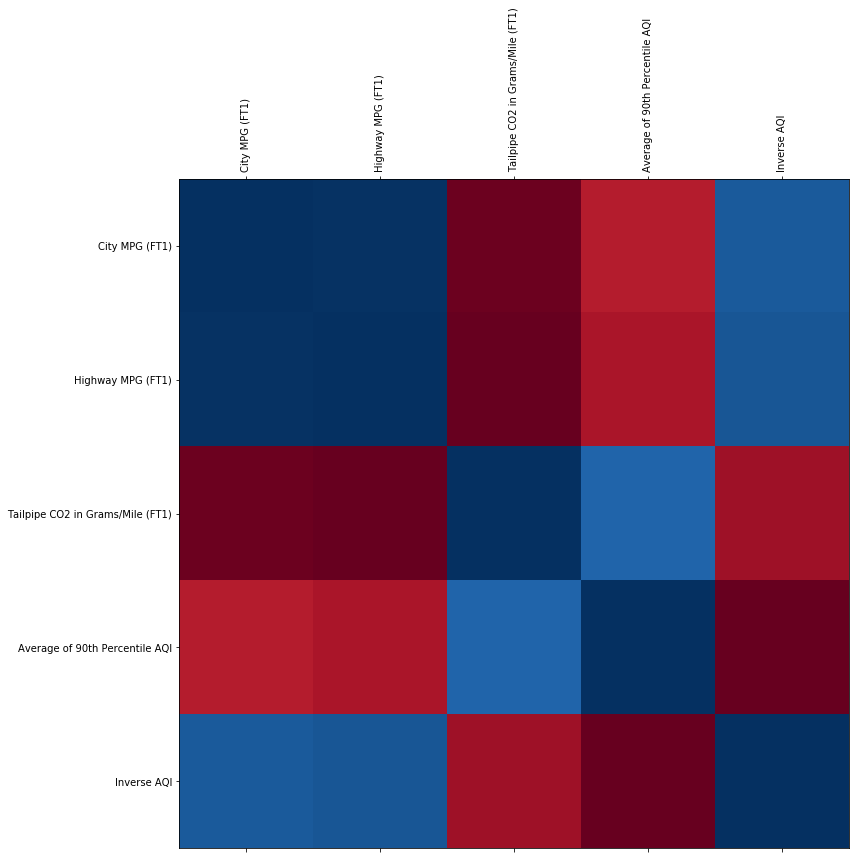

In [128]:
corr = car_emissions_aqi.corr(method='pearson')

fig = plt.figure(figsize=(12,12))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.savefig("Images/Corr_img_2")

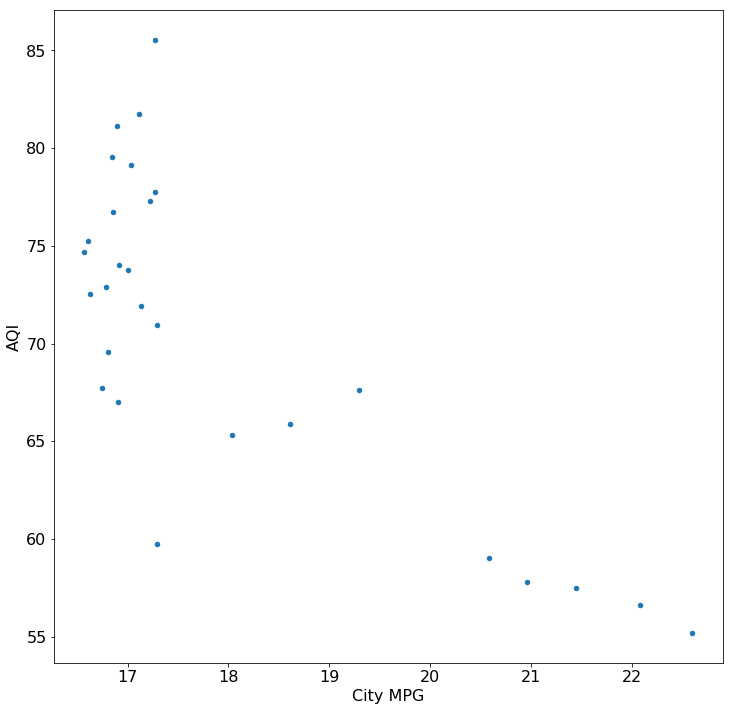

In [135]:
scatter(car_emissions_aqi["City MPG (FT1)"], car_emissions_aqi['Average of 90th Percentile AQI'], 'City MPG', 'AQI')
plt.savefig("Images/emission_scatter_1")

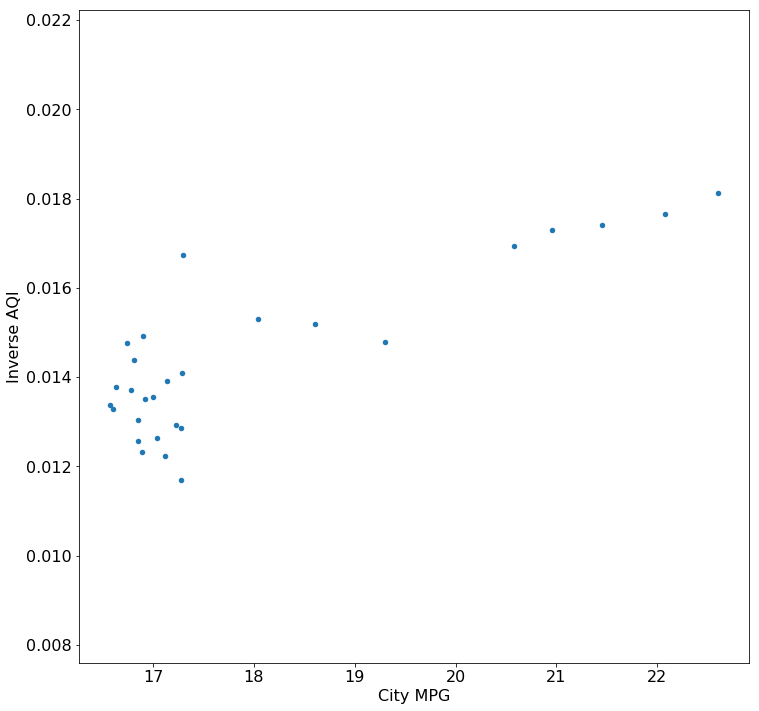

In [131]:
# city mpg versus inverse emissions
scatter(car_emissions_aqi["City MPG (FT1)"], car_emissions_aqi['Inverse AQI'], 'City MPG', 'Inverse AQI')
plt.savefig("Images/emission_scatter_2")

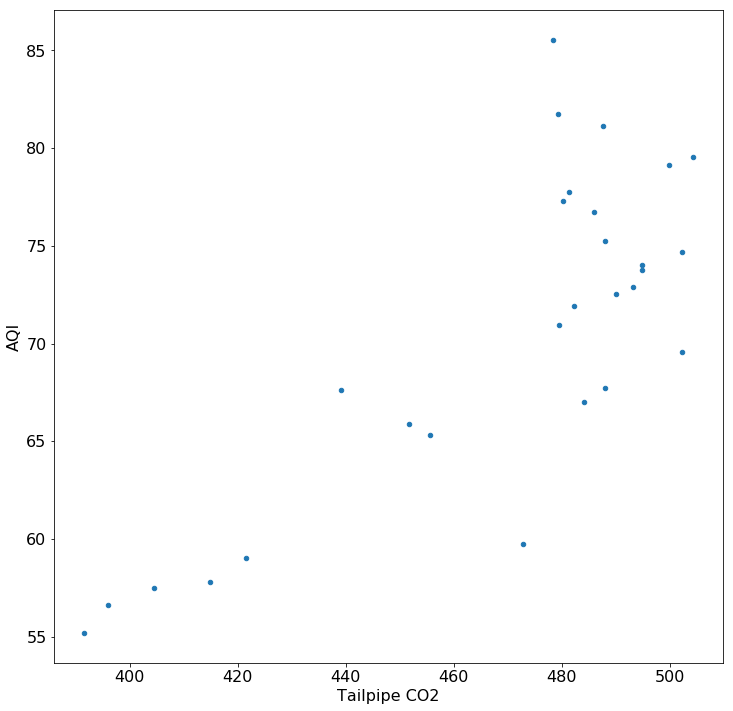

In [132]:
scatter(car_emissions_aqi["Tailpipe CO2 in Grams/Mile (FT1)"], car_emissions_aqi['Average of 90th Percentile AQI'], 'Tailpipe CO2', 'AQI')
plt.savefig("Images/emission_scatter_3")

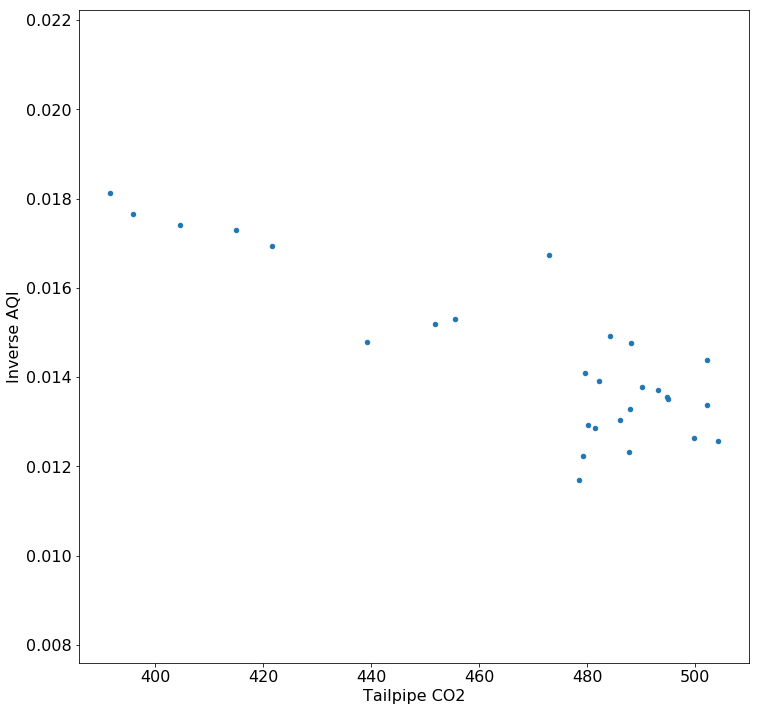

In [134]:
scatter(car_emissions_aqi["Tailpipe CO2 in Grams/Mile (FT1)"], car_emissions_aqi['Inverse AQI'], 'Tailpipe CO2', 'Inverse AQI')
plt.savefig("Images/emission_scatter_4")

In [122]:
X = car_emissions_aqi.drop(columns=["Inverse AQI"])
X

y = car_emissions_aqi[["Inverse AQI"]]
y

print(X.shape, y.shape)

(28, 4) (28, 1)


In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=324)

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [125]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9949318976307816
Testing Score: 0.9920029174033844


In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
MSE_2 = median_absolute_error(y_test, predictions)
MSE_3 = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MSE_3}")
print(f"Median Absolute Error: {MSE_2}")

Mean Squared Error: 1.647942740130534e-08
Mean Absolute Error: 0.00011309124766144313
Median Absolute Error: 0.00011845709043131411
